## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  67.616558   375.176704  0.295228  6.378652  1.085225
1   2.861998  1182.323794  0.378969  5.937569  1.539518
2  82.212967  1205.426864  0.335030  2.691109  1.541854
3  89.452344   304.962353  0.034650  8.225611  0.315980
4  65.726190   169.931680  0.147819  6.966383  0.349584


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0500930	total: 64.8ms	remaining: 1m 4s
1:	learn: 1.0394577	total: 65.8ms	remaining: 32.8s
2:	learn: 1.0296959	total: 66.7ms	remaining: 22.2s
3:	learn: 1.0174751	total: 67.9ms	remaining: 16.9s
4:	learn: 1.0016071	total: 68.3ms	remaining: 13.6s
5:	learn: 0.9882970	total: 69.2ms	remaining: 11.5s
6:	learn: 0.9766347	total: 70.1ms	remaining: 9.94s
7:	learn: 0.9636803	total: 70.9ms	remaining: 8.79s
8:	learn: 0.9491196	total: 71.5ms	remaining: 7.87s
9:	learn: 0.9371246	total: 72.2ms	remaining: 7.15s
10:	learn: 0.9271387	total: 72.9ms	remaining: 6.55s
11:	learn: 0.9157589	total: 73.5ms	remaining: 6.05s
12:	learn: 0.9042291	total: 74.1ms	remaining: 5.63s
13:	learn: 0.8921780	total: 74.7ms	remaining: 5.26s
14:	learn: 0.8813693	total: 75.3ms	remaining: 4.94s
15:	learn: 0.8704674	total: 76ms	remaining: 4.67s
16:	learn: 0.8579524	total: 76.5ms	remaining: 4.42s
17:	learn: 0.8481113	total: 77.1ms	remaining: 4.21s
18:	learn: 0.8402297	total: 77.8ms	remaining: 

29:	learn: 0.7362546	total: 84ms	remaining: 2.72s
30:	learn: 0.7296875	total: 85.4ms	remaining: 2.67s
31:	learn: 0.7214849	total: 86ms	remaining: 2.6s
32:	learn: 0.7166216	total: 86.5ms	remaining: 2.53s
33:	learn: 0.7091723	total: 87ms	remaining: 2.47s
34:	learn: 0.7008694	total: 87.6ms	remaining: 2.41s
35:	learn: 0.6913095	total: 88.1ms	remaining: 2.36s
36:	learn: 0.6827911	total: 88.5ms	remaining: 2.3s
37:	learn: 0.6760210	total: 89ms	remaining: 2.25s
38:	learn: 0.6677214	total: 89.5ms	remaining: 2.2s
39:	learn: 0.6607521	total: 90.1ms	remaining: 2.16s
40:	learn: 0.6519367	total: 90.6ms	remaining: 2.12s
41:	learn: 0.6440058	total: 91.1ms	remaining: 2.08s
42:	learn: 0.6371385	total: 91.7ms	remaining: 2.04s
43:	learn: 0.6320143	total: 92.1ms	remaining: 2s
44:	learn: 0.6268558	total: 92.5ms	remaining: 1.96s
45:	learn: 0.6199265	total: 93ms	remaining: 1.93s
46:	learn: 0.6126147	total: 93.5ms	remaining: 1.9s
47:	learn: 0.6070658	total: 94ms	remaining: 1.86s
48:	learn: 0.5999970	total: 94.

220:	learn: 0.1874056	total: 167ms	remaining: 590ms
221:	learn: 0.1864052	total: 168ms	remaining: 590ms
222:	learn: 0.1856424	total: 169ms	remaining: 588ms
223:	learn: 0.1851759	total: 169ms	remaining: 586ms
224:	learn: 0.1838026	total: 170ms	remaining: 585ms
225:	learn: 0.1829818	total: 170ms	remaining: 583ms
226:	learn: 0.1821424	total: 171ms	remaining: 581ms
227:	learn: 0.1814642	total: 171ms	remaining: 579ms
228:	learn: 0.1807381	total: 172ms	remaining: 577ms
229:	learn: 0.1800433	total: 172ms	remaining: 576ms
230:	learn: 0.1788276	total: 172ms	remaining: 574ms
231:	learn: 0.1779352	total: 173ms	remaining: 572ms
232:	learn: 0.1770085	total: 173ms	remaining: 570ms
233:	learn: 0.1763573	total: 174ms	remaining: 568ms
234:	learn: 0.1755744	total: 174ms	remaining: 567ms
235:	learn: 0.1746810	total: 174ms	remaining: 565ms
236:	learn: 0.1743385	total: 175ms	remaining: 563ms
237:	learn: 0.1734483	total: 175ms	remaining: 561ms
238:	learn: 0.1727477	total: 176ms	remaining: 559ms
239:	learn: 

407:	learn: 0.0972383	total: 246ms	remaining: 357ms
408:	learn: 0.0970277	total: 247ms	remaining: 357ms
409:	learn: 0.0967921	total: 247ms	remaining: 356ms
410:	learn: 0.0965852	total: 248ms	remaining: 355ms
411:	learn: 0.0963535	total: 248ms	remaining: 354ms
412:	learn: 0.0961504	total: 249ms	remaining: 353ms
413:	learn: 0.0959511	total: 249ms	remaining: 353ms
414:	learn: 0.0957230	total: 249ms	remaining: 352ms
415:	learn: 0.0954988	total: 250ms	remaining: 351ms
416:	learn: 0.0953029	total: 250ms	remaining: 350ms
417:	learn: 0.0951107	total: 251ms	remaining: 349ms
418:	learn: 0.0947112	total: 251ms	remaining: 348ms
419:	learn: 0.0945234	total: 251ms	remaining: 347ms
420:	learn: 0.0941343	total: 252ms	remaining: 346ms
421:	learn: 0.0939506	total: 252ms	remaining: 345ms
422:	learn: 0.0937704	total: 253ms	remaining: 345ms
423:	learn: 0.0933920	total: 253ms	remaining: 344ms
424:	learn: 0.0932177	total: 254ms	remaining: 343ms
425:	learn: 0.0928491	total: 254ms	remaining: 342ms
426:	learn: 

608:	learn: 0.0608286	total: 331ms	remaining: 212ms
609:	learn: 0.0606745	total: 332ms	remaining: 212ms
610:	learn: 0.0604259	total: 332ms	remaining: 212ms
611:	learn: 0.0603706	total: 333ms	remaining: 211ms
612:	learn: 0.0603157	total: 333ms	remaining: 210ms
613:	learn: 0.0600712	total: 334ms	remaining: 210ms
614:	learn: 0.0599471	total: 334ms	remaining: 209ms
615:	learn: 0.0597969	total: 335ms	remaining: 209ms
616:	learn: 0.0595073	total: 335ms	remaining: 208ms
617:	learn: 0.0593972	total: 335ms	remaining: 207ms
618:	learn: 0.0593430	total: 336ms	remaining: 207ms
619:	learn: 0.0591966	total: 336ms	remaining: 206ms
620:	learn: 0.0591430	total: 337ms	remaining: 205ms
621:	learn: 0.0588806	total: 337ms	remaining: 205ms
622:	learn: 0.0586019	total: 337ms	remaining: 204ms
623:	learn: 0.0584947	total: 338ms	remaining: 204ms
624:	learn: 0.0582948	total: 338ms	remaining: 203ms
625:	learn: 0.0582419	total: 339ms	remaining: 202ms
626:	learn: 0.0579900	total: 339ms	remaining: 202ms
627:	learn: 

751:	learn: 0.0420605	total: 397ms	remaining: 131ms
752:	learn: 0.0419419	total: 399ms	remaining: 131ms
753:	learn: 0.0418523	total: 400ms	remaining: 130ms
754:	learn: 0.0417954	total: 401ms	remaining: 130ms
755:	learn: 0.0417279	total: 401ms	remaining: 130ms
756:	learn: 0.0416717	total: 402ms	remaining: 129ms
757:	learn: 0.0416015	total: 403ms	remaining: 129ms
758:	learn: 0.0415078	total: 404ms	remaining: 128ms
759:	learn: 0.0414523	total: 404ms	remaining: 128ms
760:	learn: 0.0413730	total: 404ms	remaining: 127ms
761:	learn: 0.0413038	total: 405ms	remaining: 127ms
762:	learn: 0.0412118	total: 405ms	remaining: 126ms
763:	learn: 0.0411570	total: 406ms	remaining: 125ms
764:	learn: 0.0410885	total: 407ms	remaining: 125ms
765:	learn: 0.0409879	total: 408ms	remaining: 125ms
766:	learn: 0.0408732	total: 408ms	remaining: 124ms
767:	learn: 0.0407880	total: 409ms	remaining: 124ms
768:	learn: 0.0407216	total: 409ms	remaining: 123ms
769:	learn: 0.0405989	total: 410ms	remaining: 122ms
770:	learn: 

935:	learn: 0.0296659	total: 478ms	remaining: 32.7ms
936:	learn: 0.0296169	total: 479ms	remaining: 32.2ms
937:	learn: 0.0295424	total: 480ms	remaining: 31.7ms
938:	learn: 0.0294872	total: 480ms	remaining: 31.2ms
939:	learn: 0.0294389	total: 481ms	remaining: 30.7ms
940:	learn: 0.0293657	total: 481ms	remaining: 30.2ms
941:	learn: 0.0293421	total: 482ms	remaining: 29.6ms
942:	learn: 0.0292943	total: 482ms	remaining: 29.1ms
943:	learn: 0.0292628	total: 482ms	remaining: 28.6ms
944:	learn: 0.0291913	total: 483ms	remaining: 28.1ms
945:	learn: 0.0291601	total: 483ms	remaining: 27.6ms
946:	learn: 0.0291367	total: 484ms	remaining: 27.1ms
947:	learn: 0.0291058	total: 484ms	remaining: 26.5ms
948:	learn: 0.0290827	total: 484ms	remaining: 26ms
949:	learn: 0.0290523	total: 485ms	remaining: 25.5ms
950:	learn: 0.0289907	total: 485ms	remaining: 25ms
951:	learn: 0.0289443	total: 486ms	remaining: 24.5ms
952:	learn: 0.0289213	total: 486ms	remaining: 24ms
953:	learn: 0.0288937	total: 487ms	remaining: 23.5ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3009531903020353


ABC Pre-generator MAE 0.2984839475905783


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

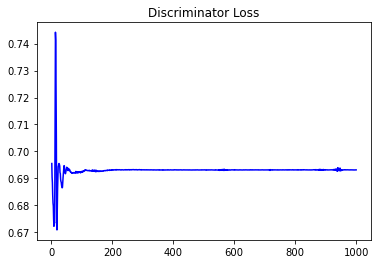

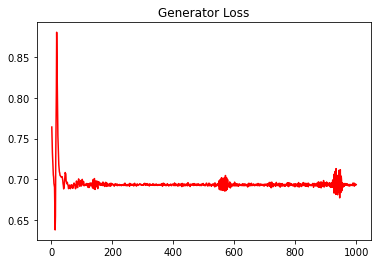

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3128313134846976


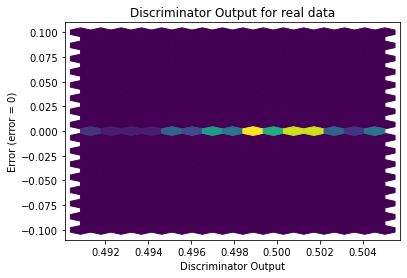

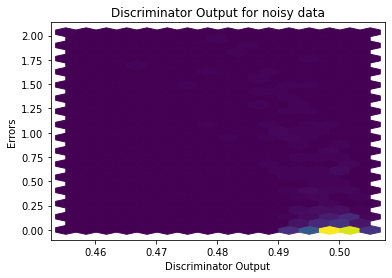

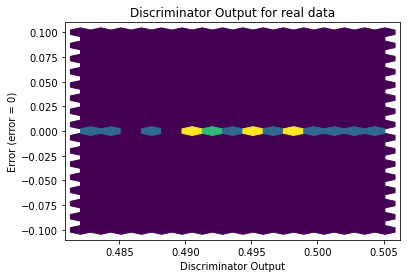

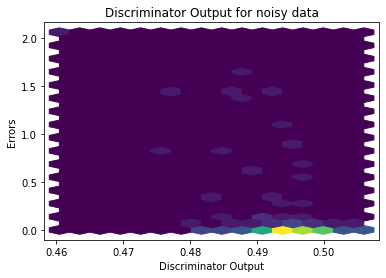

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

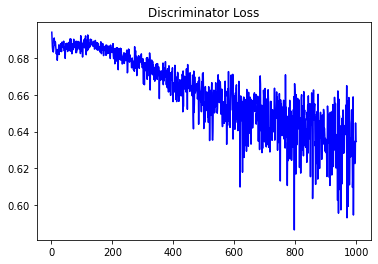

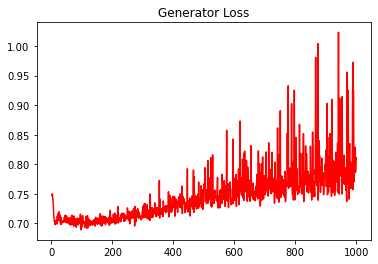

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.44670562131830954


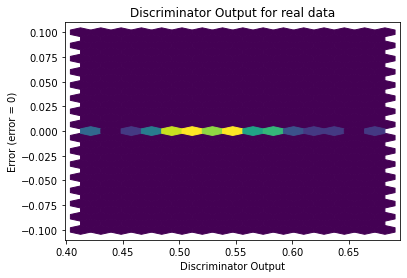

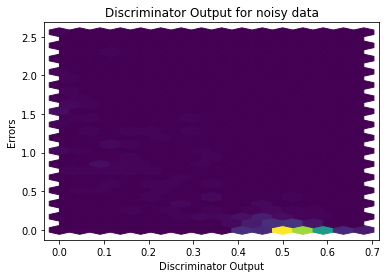

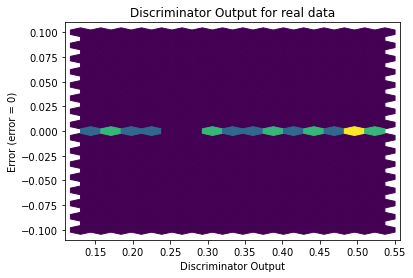

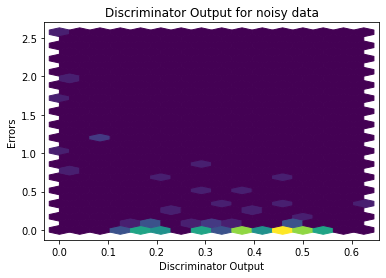

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


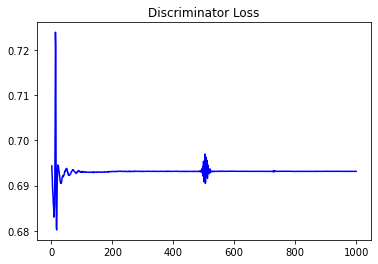

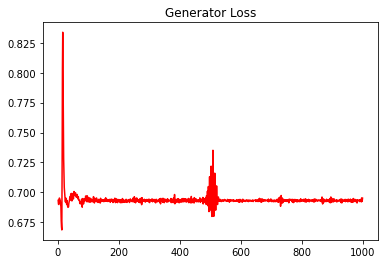

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.30087360356689896


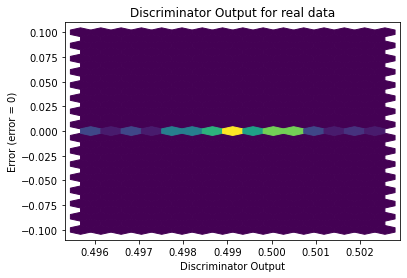

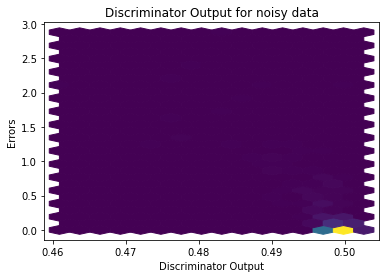

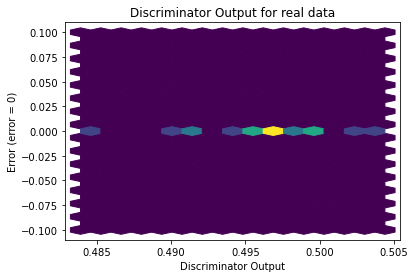

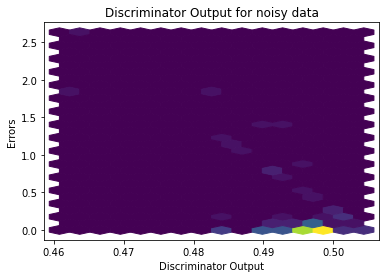

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


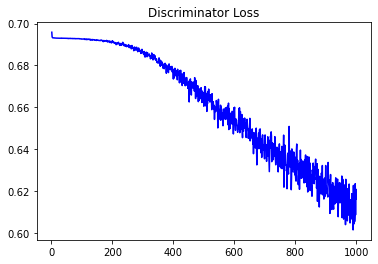

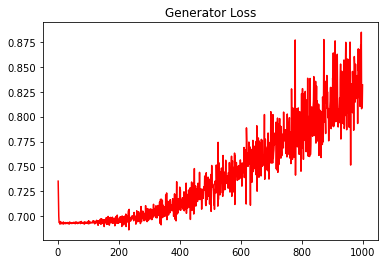

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.29977696911850943


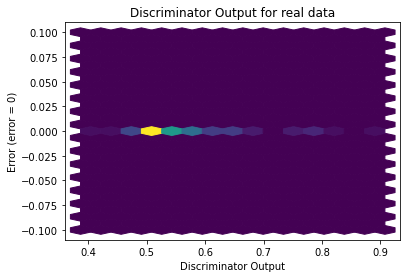

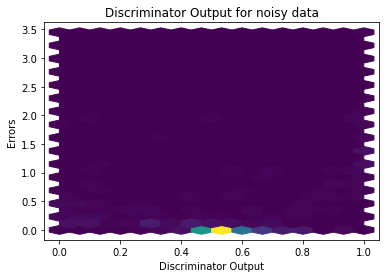

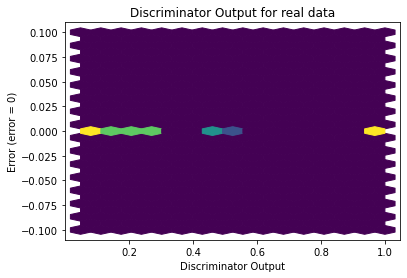

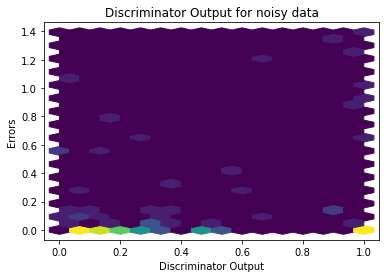

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6505]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
